In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [11]:
# Read the data from csv
train_dataset_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")


# Get the correspondent numpy array of the data
train_dataset_np = train_dataset_df.values


# Extract the labels and the pixel standardized.
train_labels =  train_dataset_np[:, 0]
train_pixels = train_dataset_np[:, 1 : ] / 255.0

# convert the train labels to one hot vectors
# and split the dataset into train and test set
train_labels_one_hot = to_categorical(train_labels)
x_train, x_test, y_train, y_test = train_test_split(train_pixels, train_labels_one_hot, test_size=0.25, random_state=0)

# Conerting the train and test data to 2D matrix in
# order to feed the Convolutional 2D NN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Images on the training set


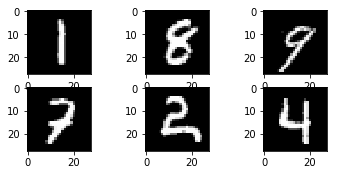

In [13]:
# Lets visualize some images
print('Images on the training set')
for i in range(0, 6):
    plt.subplot(330 + i+1)
    plt.imshow(x_train[i, : :].reshape(28, 28), cmap='gray')


Images on the test set


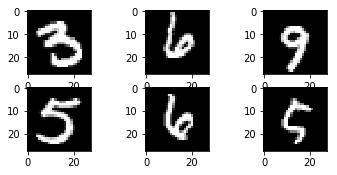

In [14]:
print('Images on the test set')
for i in range(0, 6):
    plt.subplot(330 + i+1)
    plt.imshow(x_test[i, : :].reshape(28, 28), cmap='gray')

In [17]:
# Defining the model
def model(input_size):
    """
    Convolutional 2D model
    
    Arguments: 
    input_size shape of the images
    to feed the Conv2D -- Python dict
    
    Return:
    model -- Keras Seqential object representing 
    the model
    """
    classifier = Sequential()
    classifier.add(Conv2D(32, (3, 3), input_shape=input_size, activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Conv2D(64, (3, 3), input_shape=input_size, activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Conv2D(128, (3, 3), input_shape=input_size, activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units=10, activation='softmax'))
    return classifier

In [19]:
conv_model = model((28, 28, 1))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [20]:
conv_model.fit(x = x_train, y = y_train, epochs = 15, batch_size = 32, validation_data = (x_test, y_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
31500/31500 [==============================] - 21s 674us/step - loss: 0.3042 - acc: 0.9032 - val_loss: 0.1197 - val_acc: 0.9645
Epoch 2/15
31500/31500 [==============================] - 20s 650us/step - loss: 0.0949 - acc: 0.9722 - val_loss: 0.0780 - val_acc: 0.9753
Epoch 3/15
31500/31500 [==============================] - 20s 644us/step - loss: 0.0675 - acc: 0.9799 - val_loss: 0.0613 - val_acc: 0.9795
Epoch 4/15
31500/31500 [==============================] - 21s 651us/step - loss: 0.0516 - acc: 0.9844 - val_loss: 0.0883 - val_acc: 0.9736
Epoch 5/15
31500/31500 [==============================] - 21s 660us/step - loss: 0.0408 - acc: 0.9868 - val_loss: 0.0679 - val_acc: 0.9798
Epoch 6/15
31500/31500 [==============================] - 21s 658us/step - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0815 - val_acc: 0.9779
Epoch 7/15
31500/31500 [==============================] - 21s 660us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.

Text(0, 0.5, 'Accuracy')

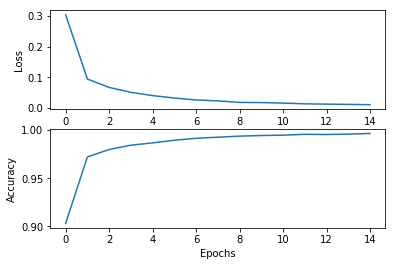

In [21]:
# Plotting the graphs due to loss and accuracy
plt.subplot(2,1,1)
plt.plot(conv_model.history.history['loss'], label='Trainning loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(conv_model.history.history['acc'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [22]:
# read the test set to submit for the competition
test_dataset_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_dataset_np = test_dataset_df.values
test_pixels = test_dataset_np.reshape(test_dataset_np.shape[0], 28, 28, 1) / 255.0
predictions = conv_model.predict(test_pixels)
labels = np.argmax(predictions, axis=1)
submission_df = pd.DataFrame({'ImageId' : range(1, test_dataset_np.shape[0] + 1), 'Label' : labels})
submission_df.to_csv('minist_kaggle_submission.csv', index=False)

In [23]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
